In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
item_categories=pd.read_csv('item_categories.csv')
items=pd.read_csv('items.csv')
sales_train=pd.read_csv('sales_train.csv')
data = pd.read_csv('sales_train.csv')
shops=pd.read_csv('shops.csv')
test=pd.read_csv('test.csv')

In [3]:
data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [6]:
data['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [7]:
data['shop_id'].unique().shape

(60,)

In [8]:
data['item_id'].unique().shape

(21807,)

there are total 60 shops and total 21807 unique items. And the date ranges from 

entries number and date_block_number

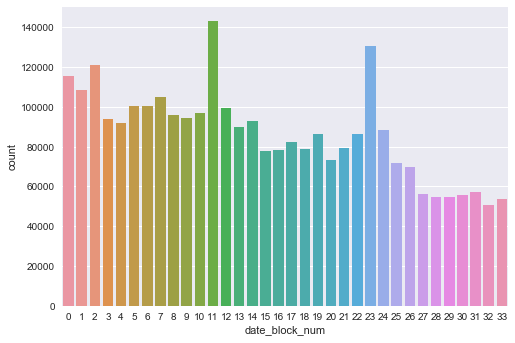

In [9]:
sns.countplot(x='date_block_num', data=sales_train)
plt.show()

we can clearly see that there are more records for Decembers of every year. I think it is because People tend to buy more items during the Chrismas. Actually it is a seasonality. We can also find a trend that the entries are becoming fewer from 2013 to 2014.

item entries of different shop

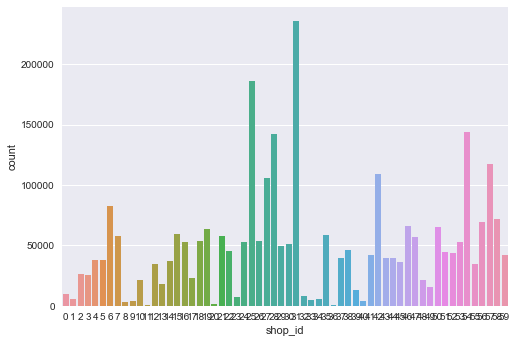

In [10]:
sns.countplot(x='shop_id', data=sales_train)
plt.show()

the shop 31 and 25 has the most bumber of entires, they may make a great contribution to the total sales trends.Therefore we need discover further for this two shops.

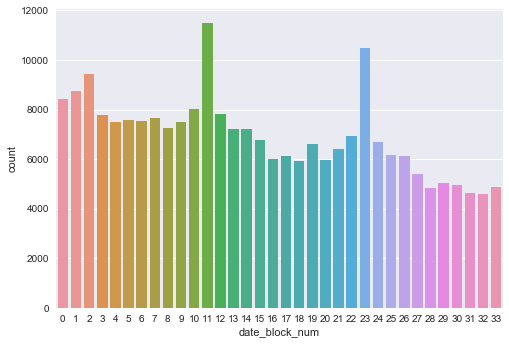

In [11]:
shop31=sales_train[sales_train['shop_id']==31]
sns.countplot(x='date_block_num', data=shop31)
plt.show()

In [12]:
sales_month = sales_train.groupby(['date_block_num'])['item_cnt_day'].sum()
sales_month=pd.DataFrame(sales_month)
sales_month["date_block_num"]=sales_month.index

total item sold of every month

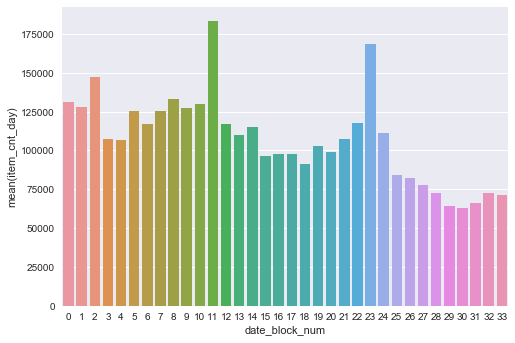

In [13]:
sns.barplot(x="date_block_num", y="item_cnt_day", data=sales_month , order=sales_month['date_block_num'])
plt.show()

In [14]:
dt = sales_train.iloc[:,:].values
dt[:,4:5]
revenue=np.multiply(dt[:,4:5],dt[:,5:])
re = pd.DataFrame(revenue)
re.columns = ['revenue']
new_salse=pd.concat([sales_train,re],axis=1)

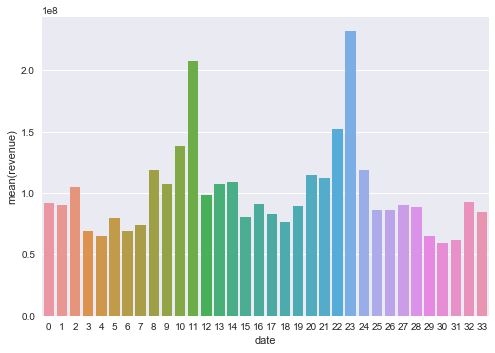

In [15]:
sales_price = new_salse.groupby(['date_block_num'])['revenue'].sum()
sales_price=pd.DataFrame(sales_price)
sales_price['date']=sales_price.index.values
sns.barplot(x="date", y="revenue", data=sales_price , order=sales_price['date'])
plt.show()

In the graph, the December of the 2013 and 2014 are also the most top month, but interesting thing is that even the item sold of 2013 is more than the 2014, the total revenue of 2014 is much than 2013.Inaddtion there isn't a decreasing trend for total revenue from 2013 to 2014. That is said, even the number of item sold decrease, the price of each item increase.

12/2013 sales suitation 

In [16]:
price_2013=new_salse[new_salse['date_block_num']==11]
sales_day =price_2013.groupby(['date']).sum()
sales_day.index.values
sales_day['dd']=sales_day.index.values

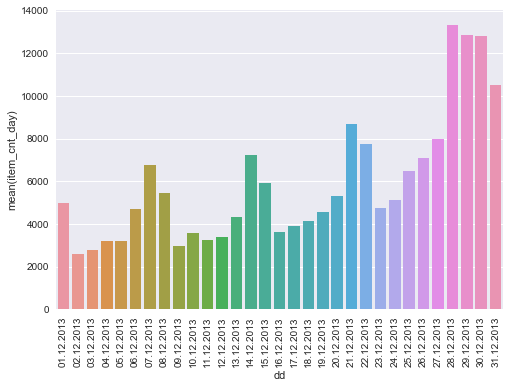

In [17]:
sns.barplot(x="dd", y="item_cnt_day", data=sales_day , order=sales_day['dd'] )
plt.xticks(rotation=90)
plt.show()

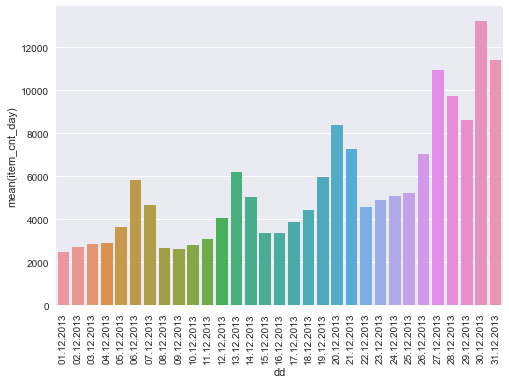

In [18]:
price_2014=new_salse[new_salse['date_block_num']==23]
sales_day14 =price_2014.groupby(['date']).sum()
sales_day14
sales_day14.index.values
sales_day14['dd']=sales_day.index.values
sns.barplot(x="dd", y="item_cnt_day", data=sales_day14 , order=sales_day14['dd'] )
plt.xticks(rotation=90)
plt.show()